In [1]:
import os
import datetime
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
plt.style.use('ggplot')

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [11]:
experiment_files = ['../results/2_output.csv', '../results/1_output.csv']#, '../results/3_output.csv', '../results/4_output.csv', '../results/1_output.csv']
hive_names = ['Cohort 1', 'Cohort 2', 'Experiment 4', 'Normal Hive']

experiment_df_list = []
for file in experiment_files:
    df = pd.read_csv(file, comment='#', header = 0)
    experiment_df_list.append(df)

print(experiment_df_list[0].dtypes)
print(experiment_df_list[0]['result_type'].unique())

experiment_df_list[0]

day_num                                  int64
diff_mean_all_tracked_speeds           float64
diff_mean_clustering                   float64
diff_mean_density                      float64
diff_mean_min_tracked_speeds           float64
diff_mean_node_degree                  float64
diff_median_all_tracked_speeds         float64
diff_median_clustering                 float64
diff_median_density                    float64
diff_median_min_tracked_speeds         float64
diff_median_node_degree                float64
diff_spread_all_tracked_all_xy         float64
diff_spread_all_tracked_individuals    float64
diff_spread_min_tracked_all_xy         float64
diff_spread_min_tracked_individuals    float64
mean_all_tracked_speeds                float64
mean_clustering                        float64
mean_density                           float64
mean_min_tracked_speeds                float64
mean_node_degree                       float64
median_all_tracked_speeds              float64
median_cluste

,day_num,diff_mean_all_tracked_speeds,diff_mean_clustering,diff_mean_density,diff_mean_min_tracked_speeds,diff_mean_node_degree,diff_median_all_tracked_speeds,diff_median_clustering,diff_median_density,diff_median_min_tracked_speeds,...,median_density,median_min_tracked_speeds,median_node_degree,result_type,spread_all_tracked_all_xy,spread_all_tracked_individuals,spread_min_tracked_all_xy,spread_min_tracked_individuals,tag_type,time_period
0,0,3.020365,0.139732,0.010358,3.062317,2.012730,3.269409,0.150109,0.010139,3.298449,...,0.037338,3.807887,5.172932,real,10.944326,11.405257,10.910378,11.054341,0,night
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027199,7.106335,2.835658,real,9.933599,10.153356,9.908420,9.772973,0,day
2,0,4.302984,0.139732,0.010358,4.302157,2.012730,4.320457,0.150109,0.010139,4.272902,...,0.037338,3.162278,5.172932,real,9.590282,9.776511,9.589640,9.767503,1,night
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027199,7.435179,2.835658,real,8.905367,8.915304,8.906722,8.923107,1,day
4,0,3.200401,0.139732,0.010358,3.183804,2.012730,3.611718,0.150109,0.010139,3.611718,...,0.037338,4.527693,5.172932,real,10.641876,10.419949,10.643430,10.433664,2,night
5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027199,8.139410,2.835658,real,9.662102,9.422465,9.662725,9.401503,2,day
6,0,NaN,0.139732,0.010358,NaN,2.012730,NaN,0.150109,0.010139,NaN,...,0.037338,NaN,5.172932,real,NaN,NaN,NaN,NaN,3,night
7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027199,2.121320,2.835658,real,6.621447,10.270627,6.621447,10.270627,3,day
8,0,3.727570,0.139732,0.010358,3.732812,2.012730,3.911097,0.150109,0.010139,3.911097,...,0.037338,3.605551,5.172932,real,10.184953,10.469189,10.174605,10.311756,All,night
9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027199,7.516648,2.835658,real,9.319706,9.397101,9.311868,9.256276,All,day


In [12]:
real_result_df_list = []
for df in experiment_df_list:
    real_df = df[(df['result_type'] == 'real') & (df['tag_type'] == 'All')].reset_index()
    real_result_df_list.append(real_df)
    
real_result_df_list[0]

,index,day_num,diff_mean_all_tracked_speeds,diff_mean_clustering,diff_mean_density,diff_mean_min_tracked_speeds,diff_mean_node_degree,diff_median_all_tracked_speeds,diff_median_clustering,diff_median_density,...,median_density,median_min_tracked_speeds,median_node_degree,result_type,spread_all_tracked_all_xy,spread_all_tracked_individuals,spread_min_tracked_all_xy,spread_min_tracked_individuals,tag_type,time_period
0,8,0,3.727570,0.139732,0.010358,3.732812,2.012730,3.911097,0.150109,0.010139,...,0.037338,3.605551,5.172932,real,10.184953,10.469189,10.174605,10.311756,All,night
1,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027199,7.516648,2.835658,real,9.319706,9.397101,9.311868,9.256276,All,day
2,18,1,0.031370,0.019281,0.006529,0.034699,0.647154,0.037521,0.004008,0.006240,...,0.023402,7.826238,3.834699,real,10.127591,10.040519,10.124454,9.976552,All,night
3,19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029642,7.783920,4.296230,real,11.104734,10.882603,11.096950,10.765507,All,day
4,28,2,1.294042,0.033814,0.001895,1.279400,0.155465,0.685316,0.012187,0.001762,...,0.021879,7.211103,3.127250,real,11.333139,11.174720,11.323622,11.065927,All,night
5,29,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.023641,7.905694,3.193798,real,12.077301,11.381253,12.069657,11.265147,All,day
6,38,3,0.100310,0.063870,0.000681,0.091905,0.416638,0.222089,0.073901,0.000587,...,0.021135,6.305143,2.859239,real,10.820764,10.064677,10.820742,9.981054,All,night
7,39,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.021723,6.082763,2.372549,real,11.075039,10.387023,11.068490,10.270358,All,day
8,48,4,1.418010,0.017627,0.000873,1.382756,0.073361,0.575571,0.001756,0.000939,...,0.020044,4.885284,2.746912,real,11.135516,10.373976,11.135168,10.288457,All,night
9,49,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019104,5.436441,2.625954,real,11.021027,10.596527,11.006094,10.436244,All,day


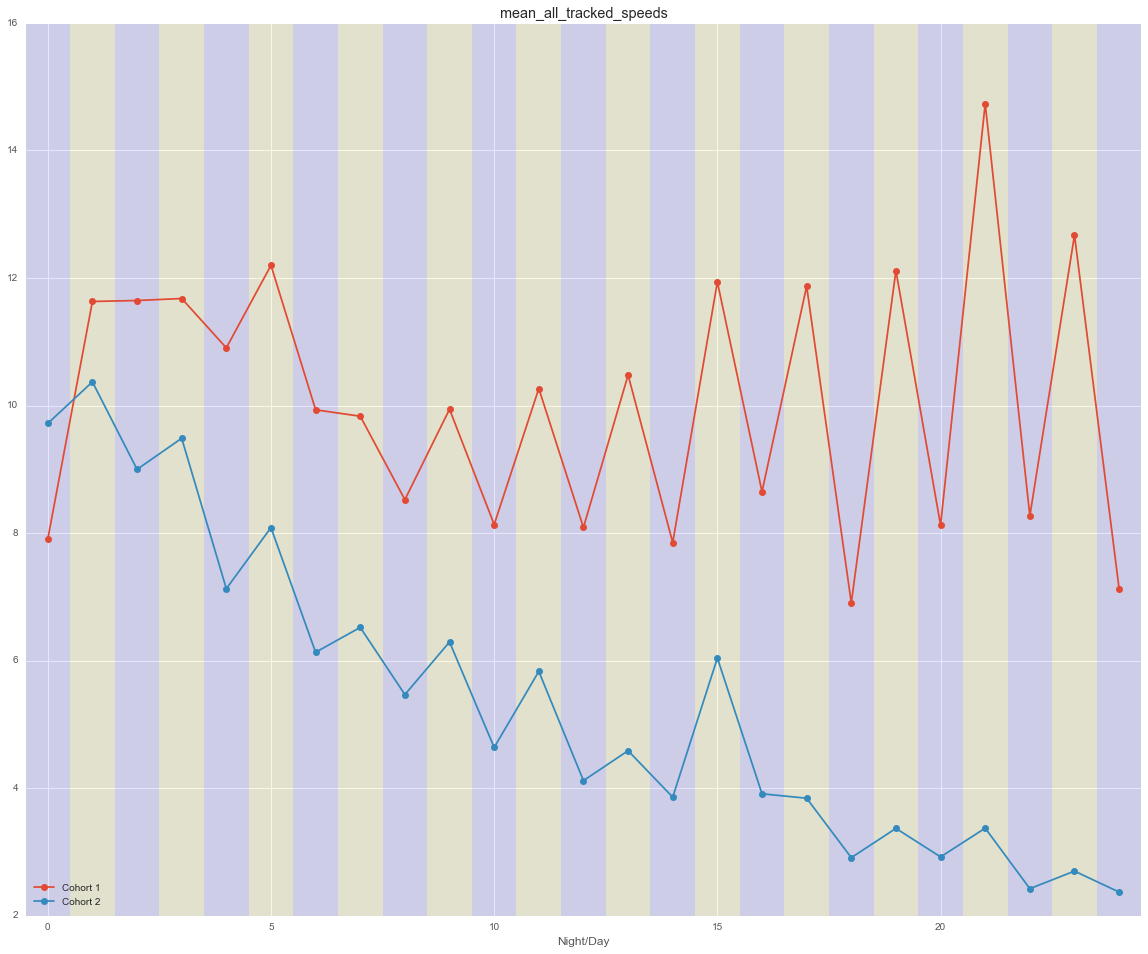

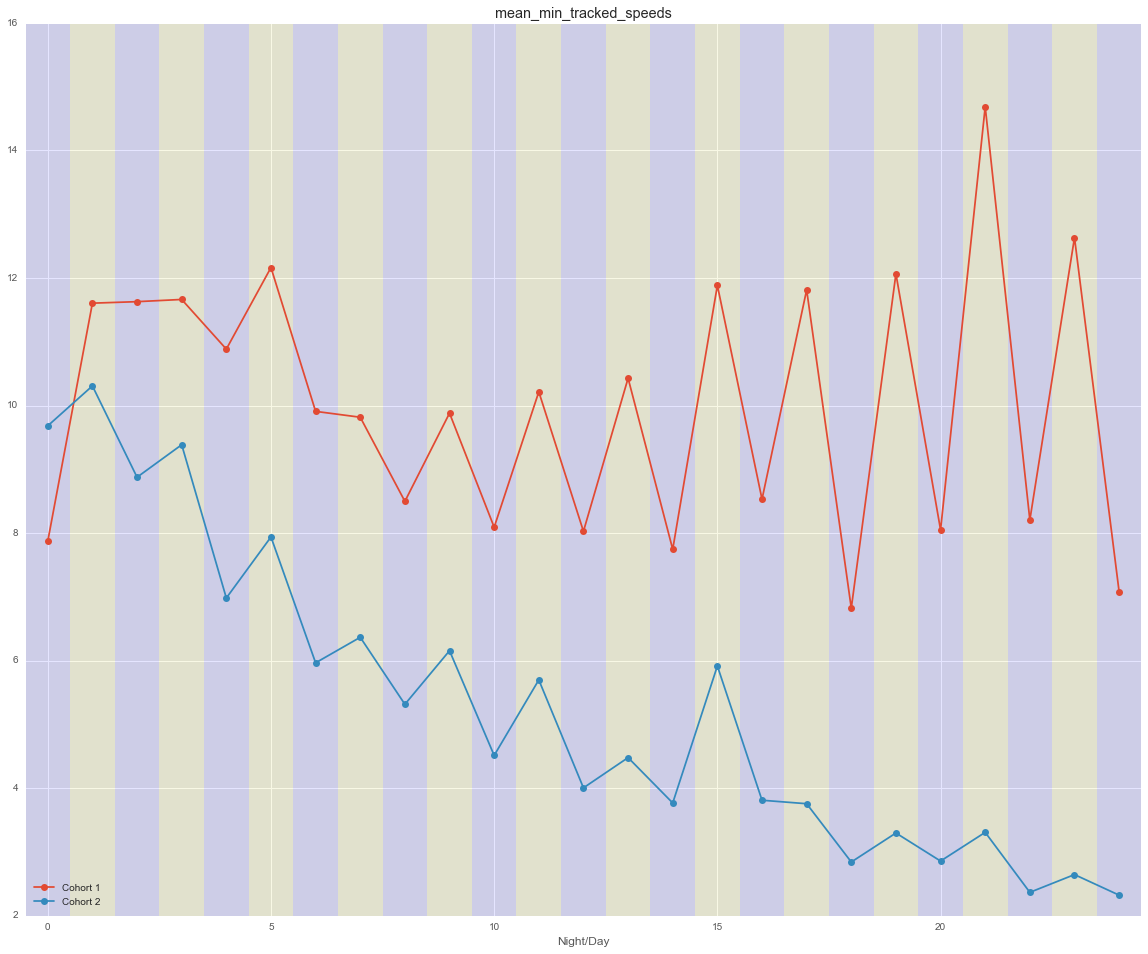

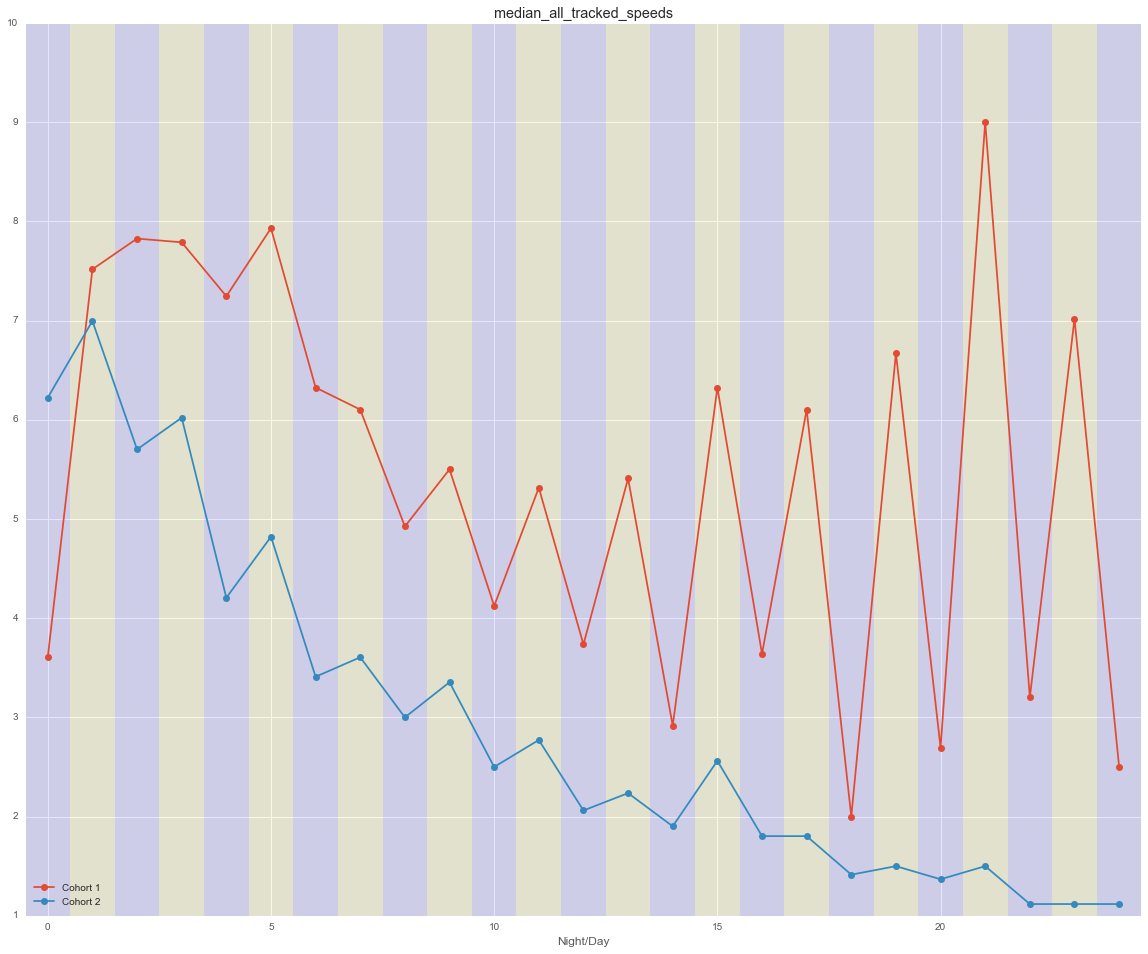

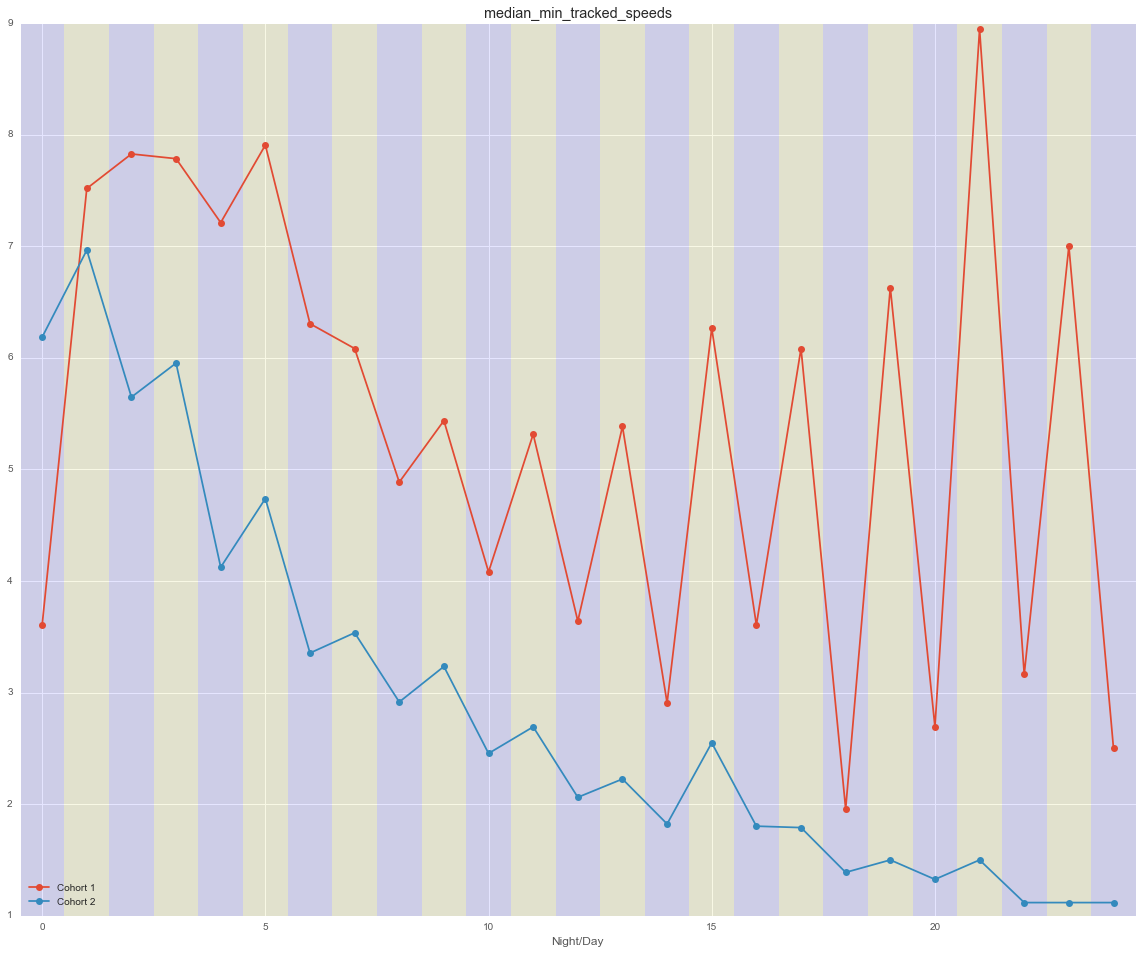

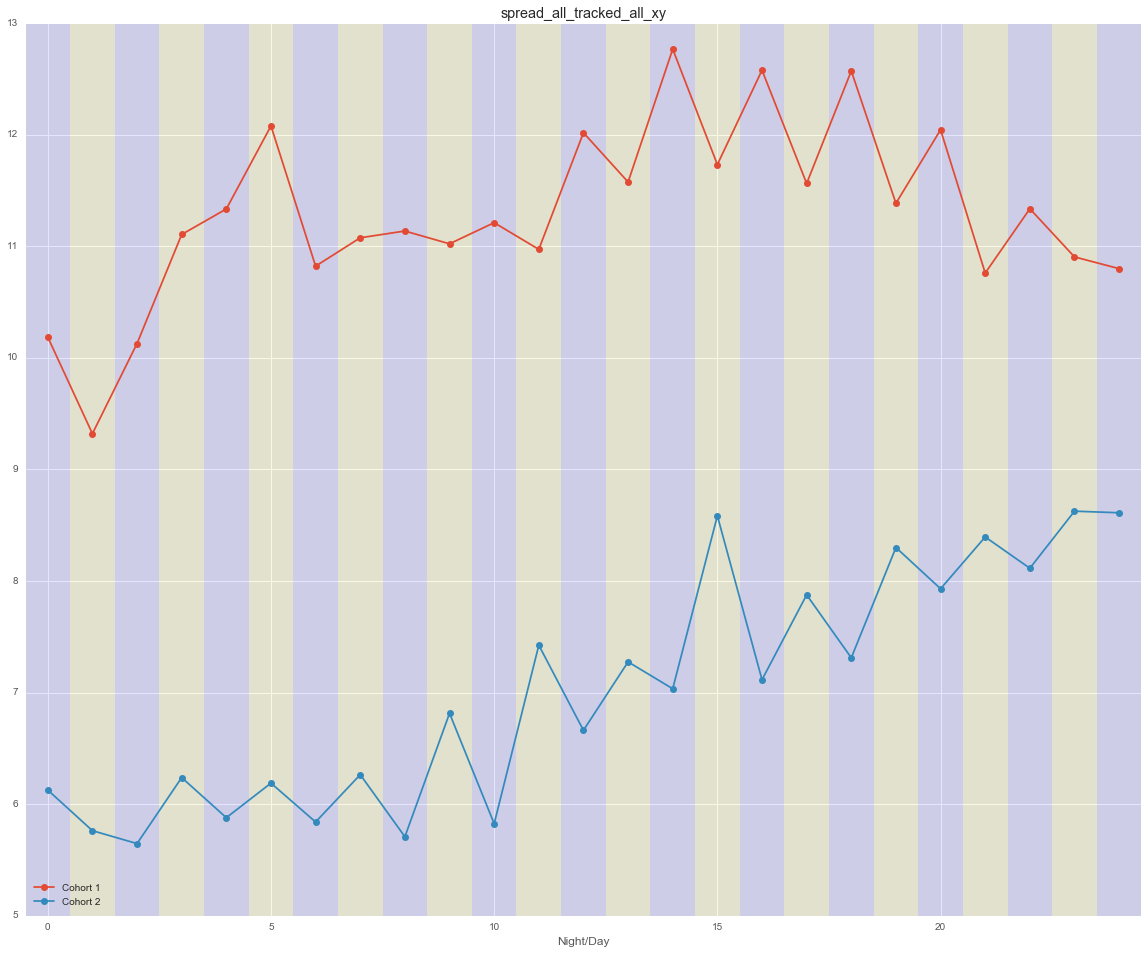

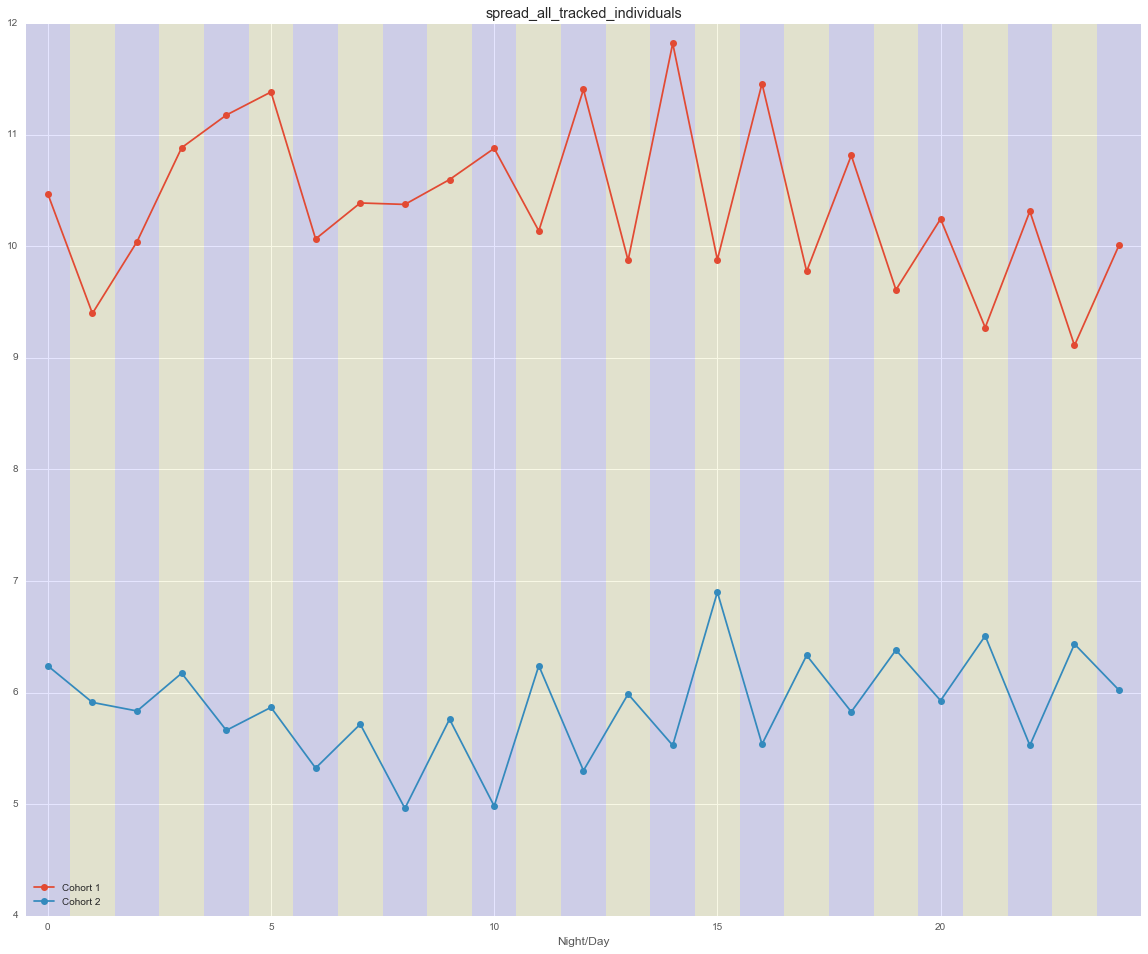

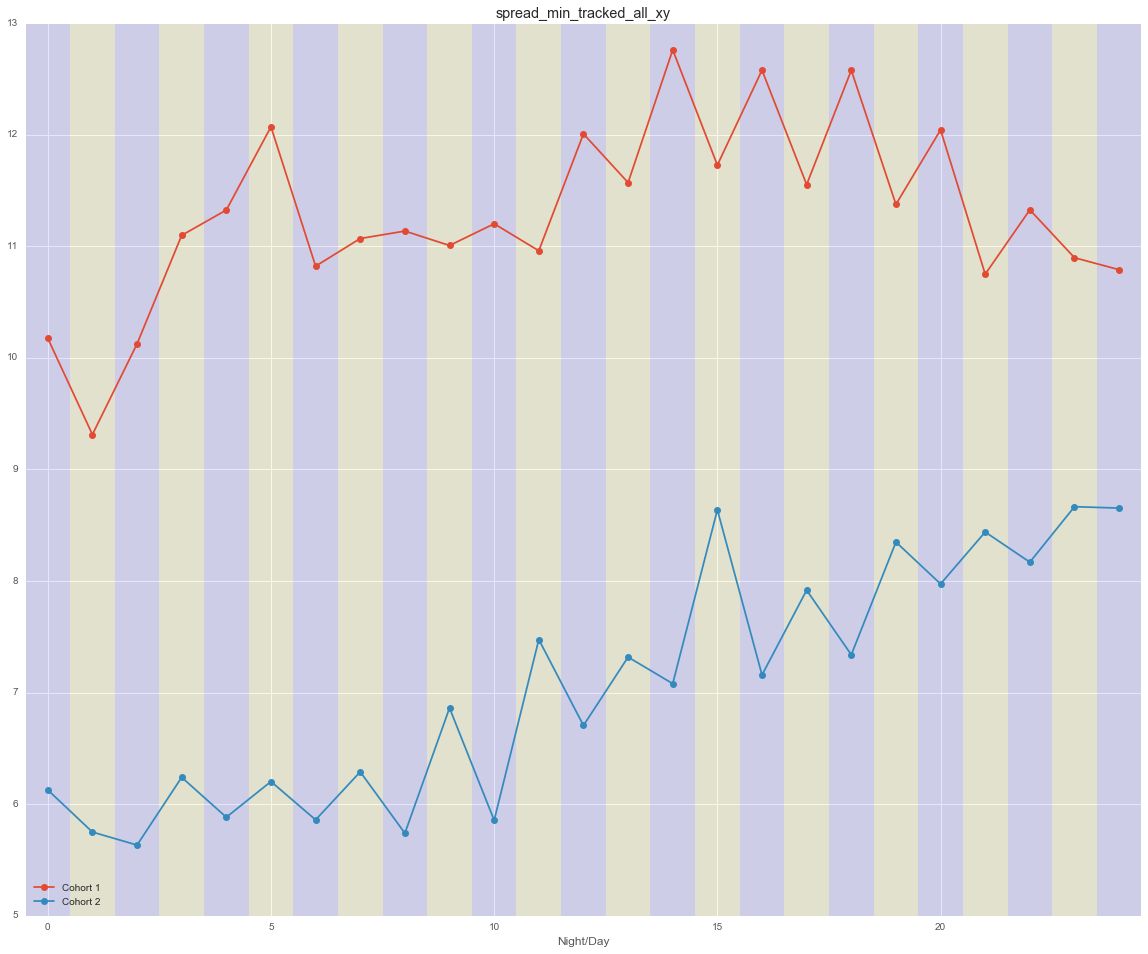

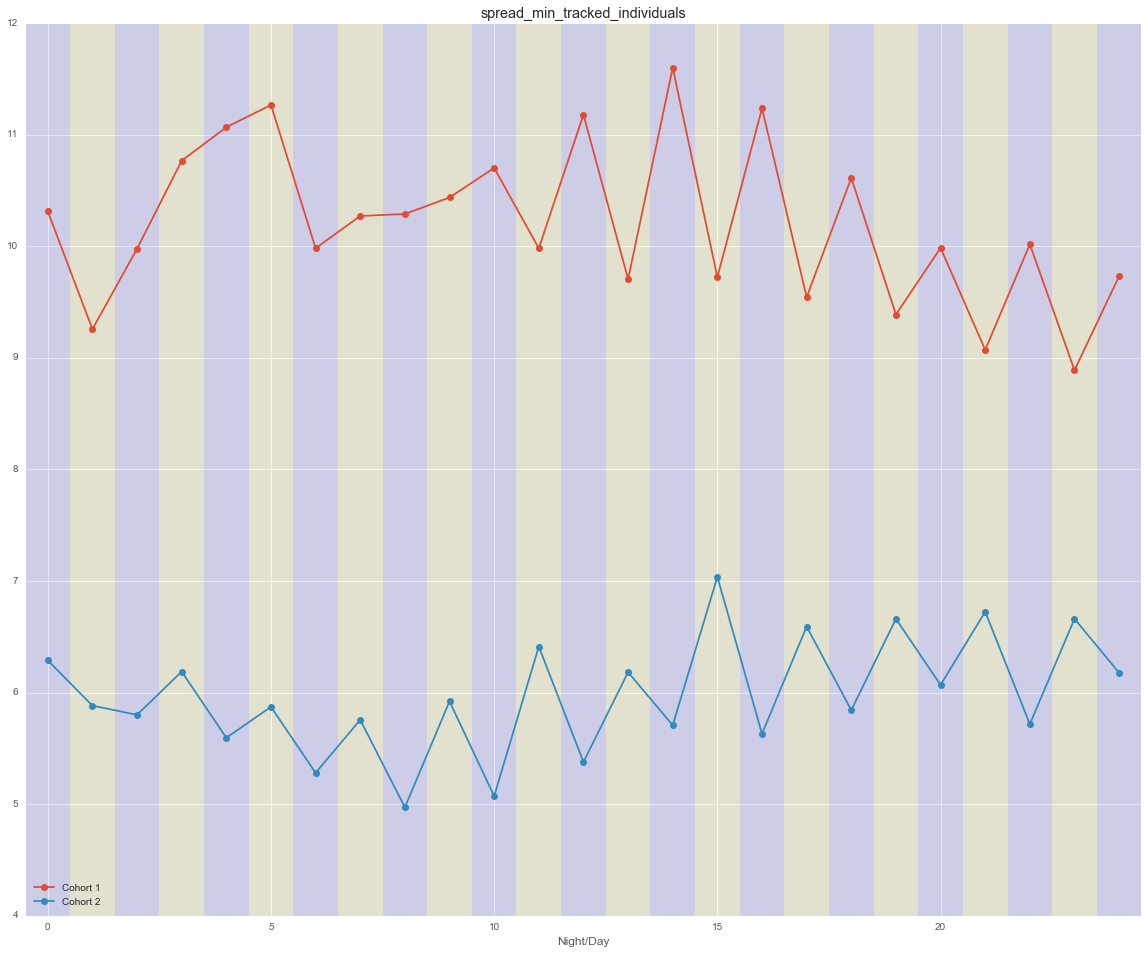

In [13]:
extended_metrics = ['mean_all_tracked_speeds', 'mean_min_tracked_speeds', 'median_all_tracked_speeds', 'median_min_tracked_speeds', 'spread_all_tracked_all_xy', 'spread_all_tracked_individuals', 'spread_min_tracked_all_xy', 'spread_min_tracked_individuals']

for metric in extended_metrics:

    for i, df in enumerate(real_result_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(metric)
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

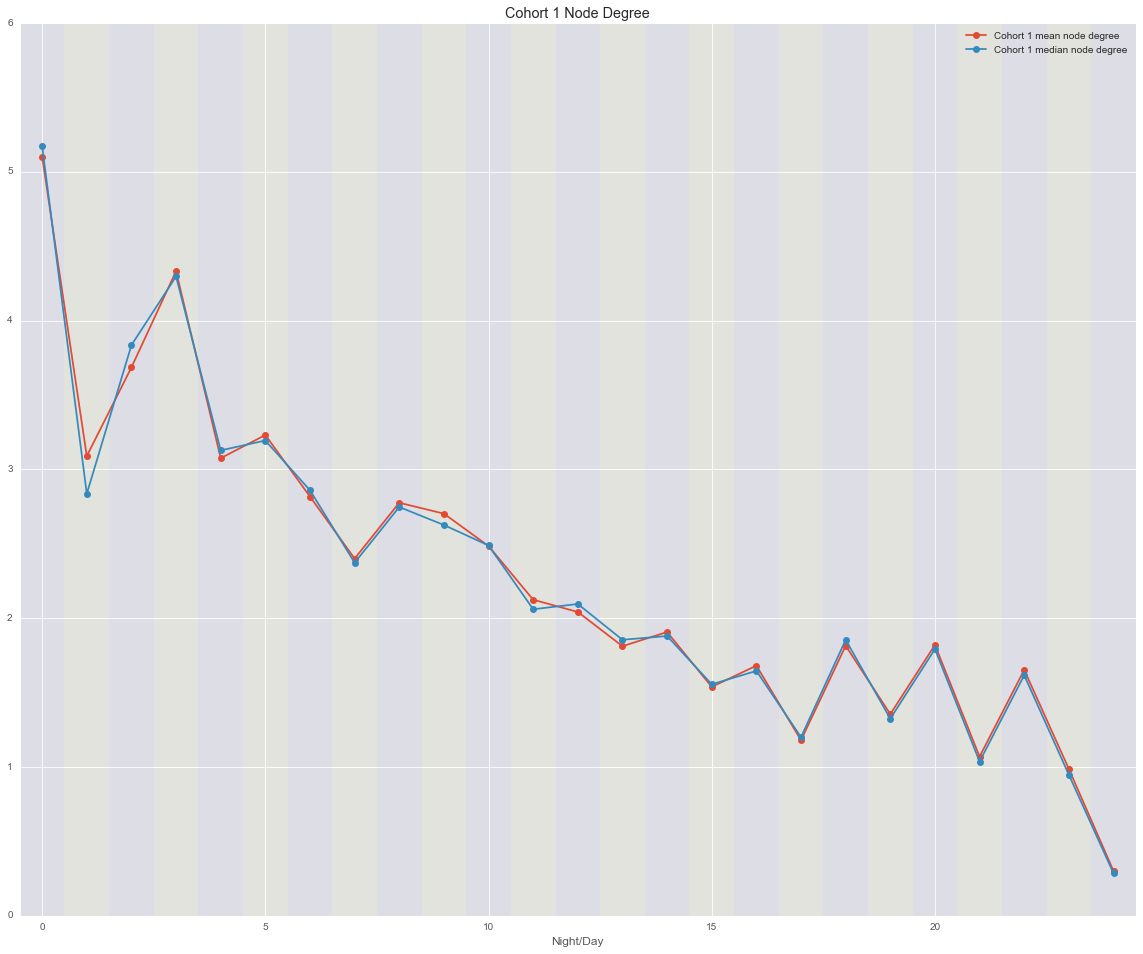

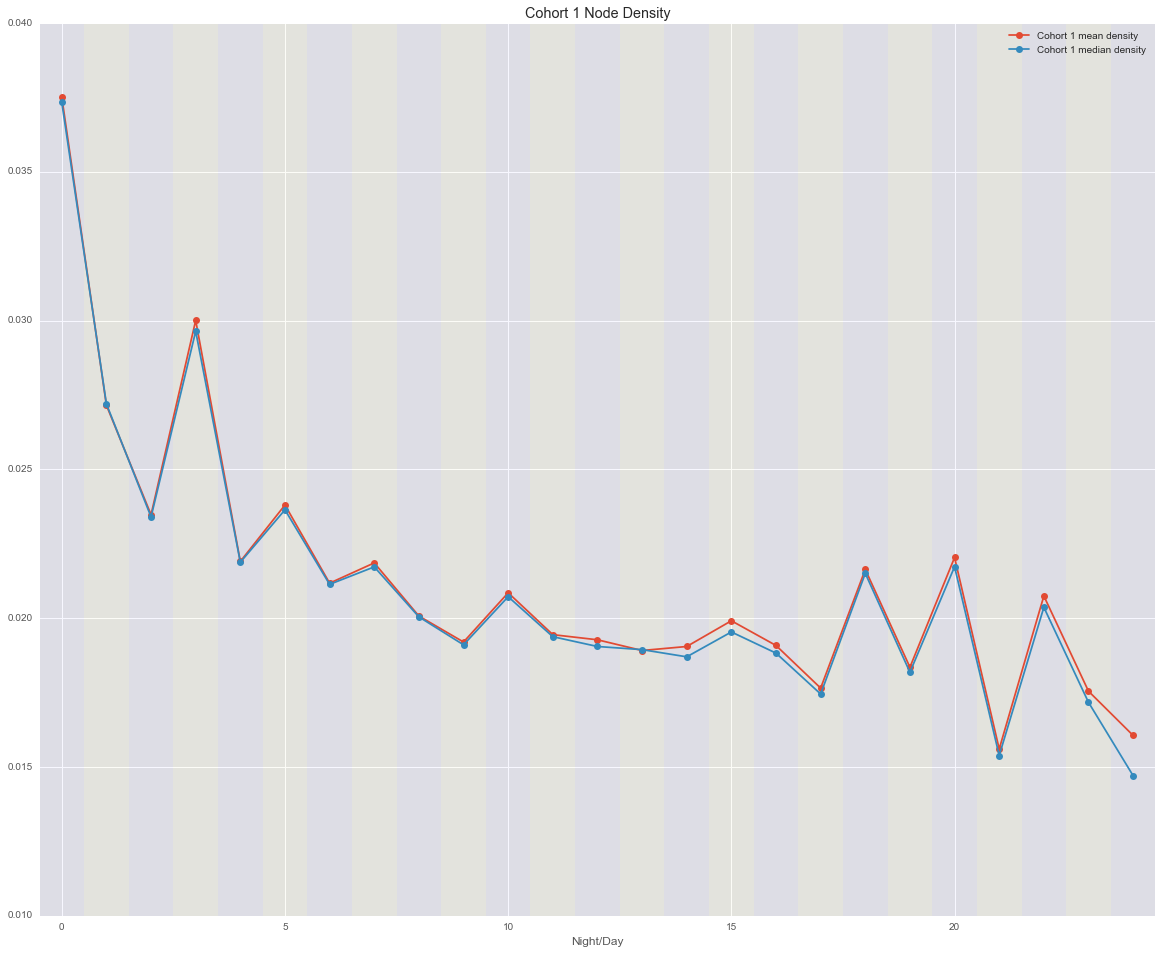

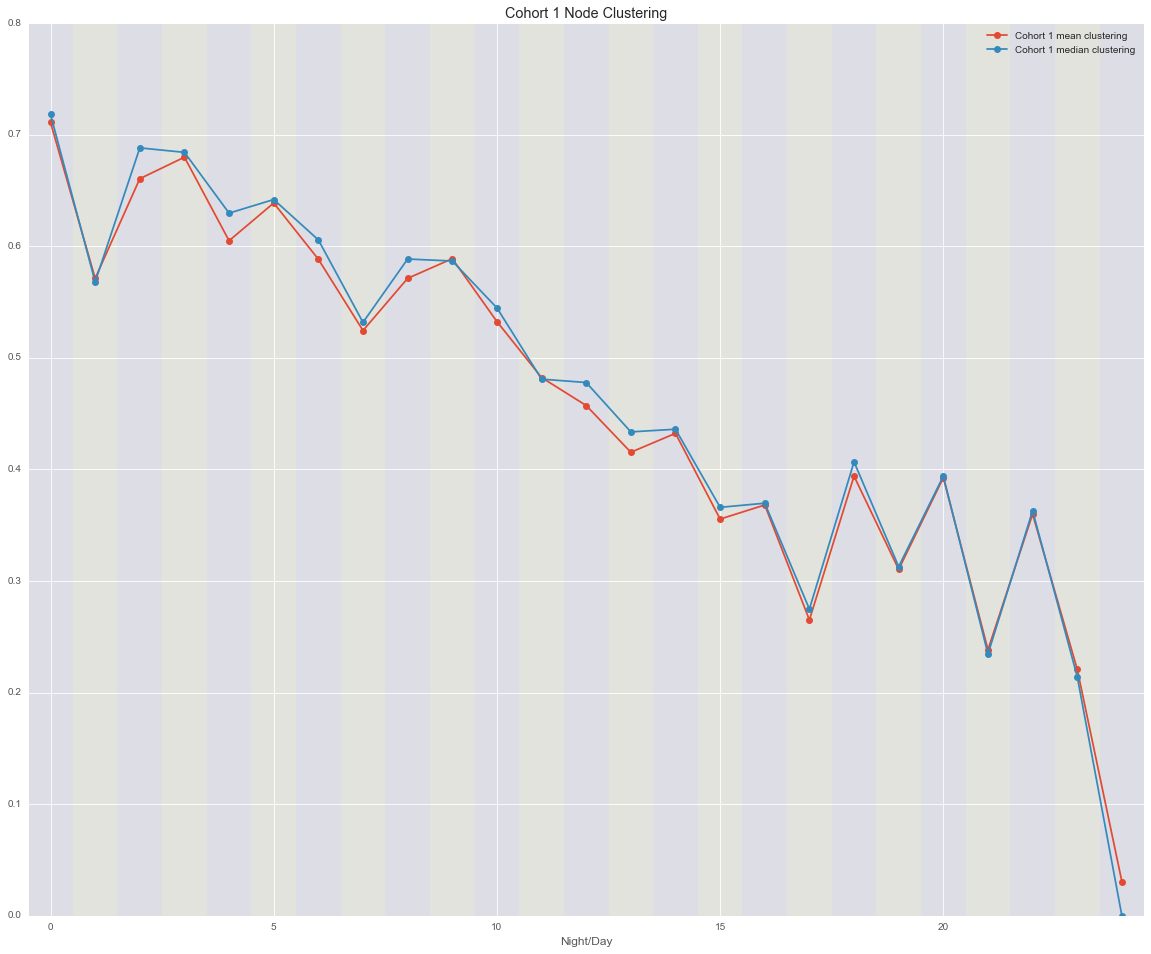

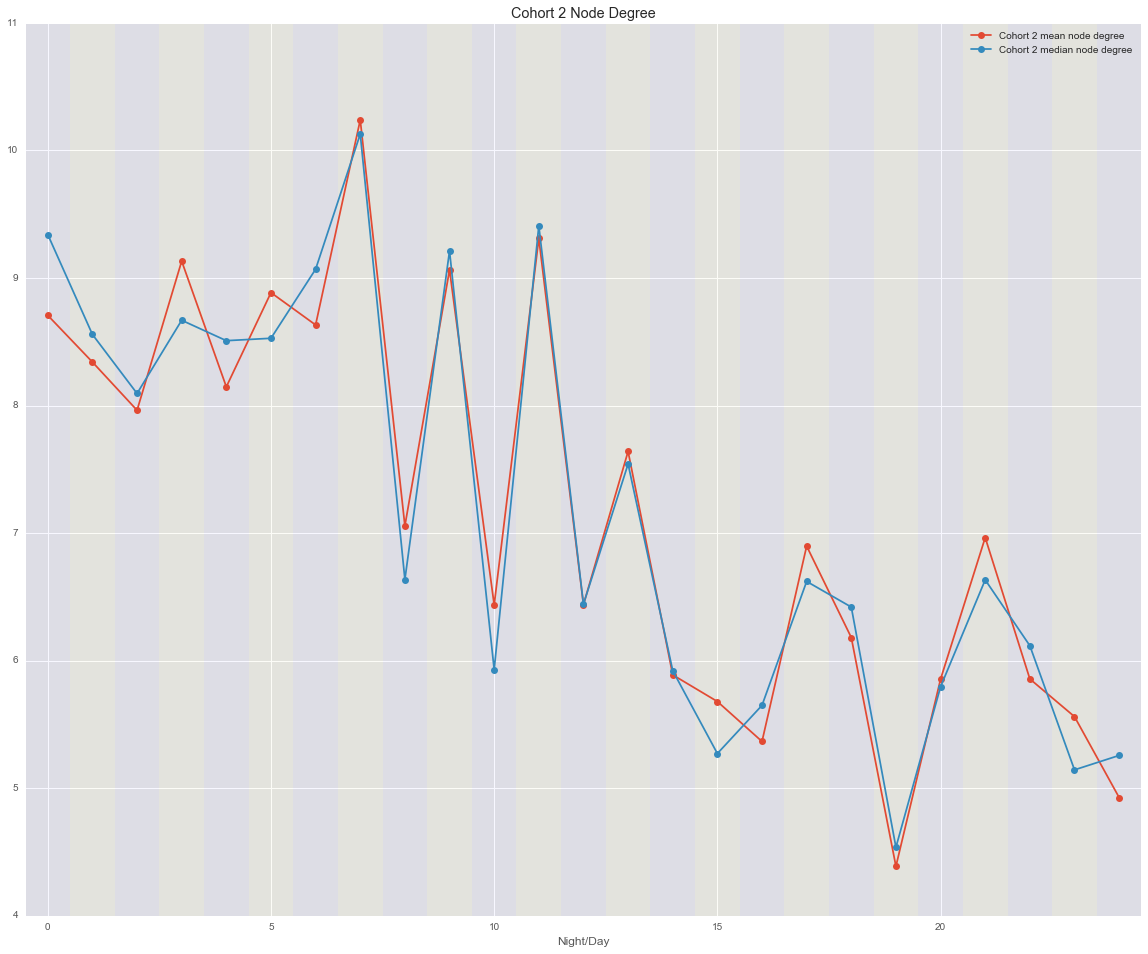

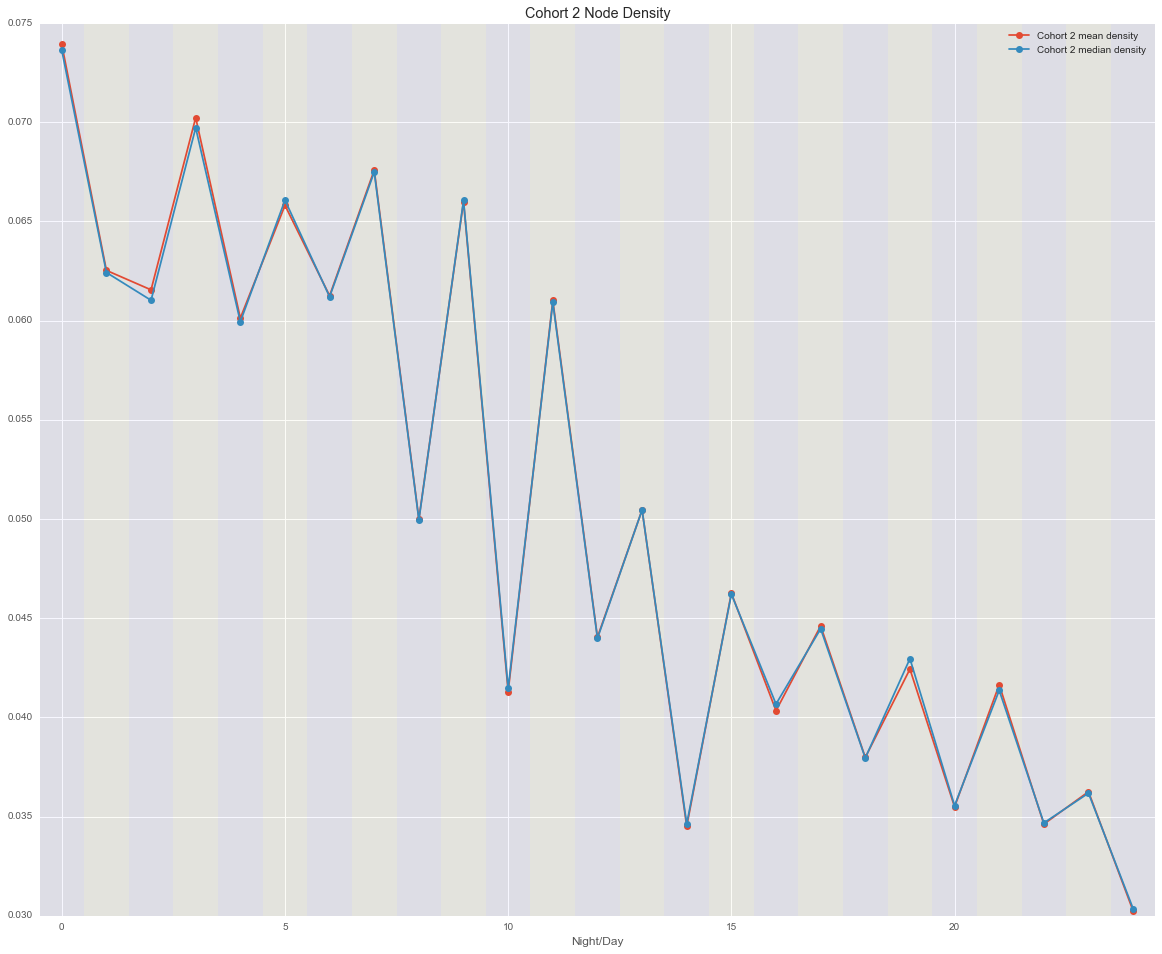

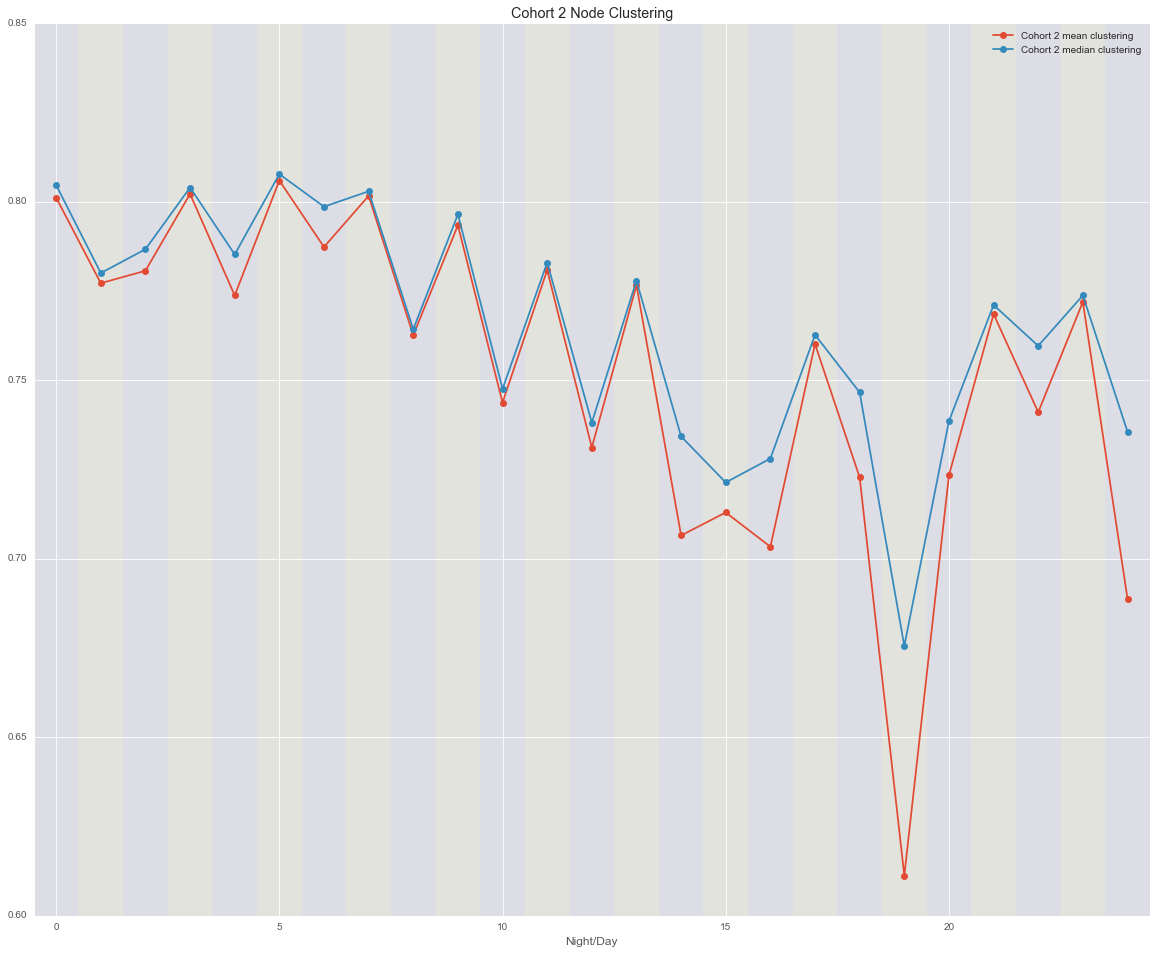

In [14]:
for i, df in enumerate(real_result_df_list):
    
    plt.plot(df['mean_node_degree'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'mean node degree'))
    plt.plot(df['median_node_degree'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median node degree'))
    plt.title('{} Node Degree'.format(hive_names[i]))
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')
    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.03, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.03, edgecolor='none')
    plt.show()
    
    
    plt.plot(df['mean_density'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'mean density'))
    plt.plot(df['median_density'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median density'))
    plt.title('{} Node Density'.format(hive_names[i]))
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')
    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.03, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.03, edgecolor='none')
    plt.show()
    
    
    plt.plot(df['mean_clustering'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'mean clustering'))
    plt.plot(df['median_clustering'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median clustering'))
    plt.title('{} Node Clustering'.format(hive_names[i]))
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')
    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.03, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.03, edgecolor='none')
    plt.show()